# `RedPlanet` Demo
Written by Zain Kamal -- [zain.eris.kamal@rutgers.edu](mailto:zain.eris.kamal@rutgers.edu).

[Project Repo](https://github.com/Humboldt-Penguin/redplanet)

---
# 1. `GRS`

In [2]:
from redplanet import GRS

## 1.1. `visualize`

Let's start by building some intuition with the dataset via quick visualizations.

The elements available are: ['al','ca','cl','fe','h2o','k','si','s','th'].

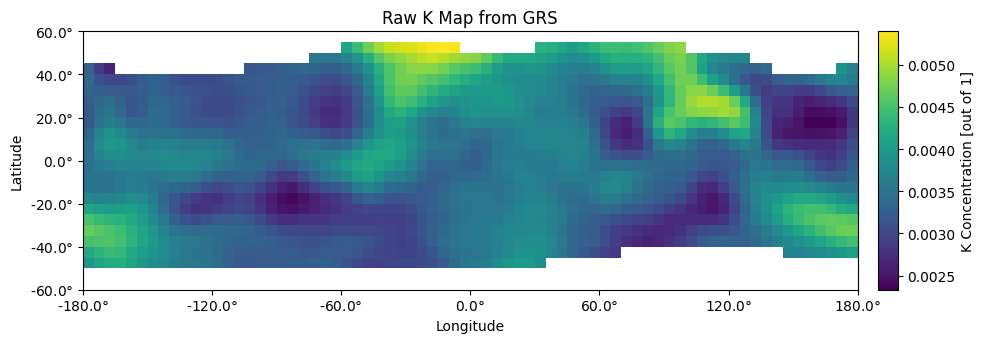

In [2]:
'''Original GRS dataset'''

GRS.visualize(element_name='k')

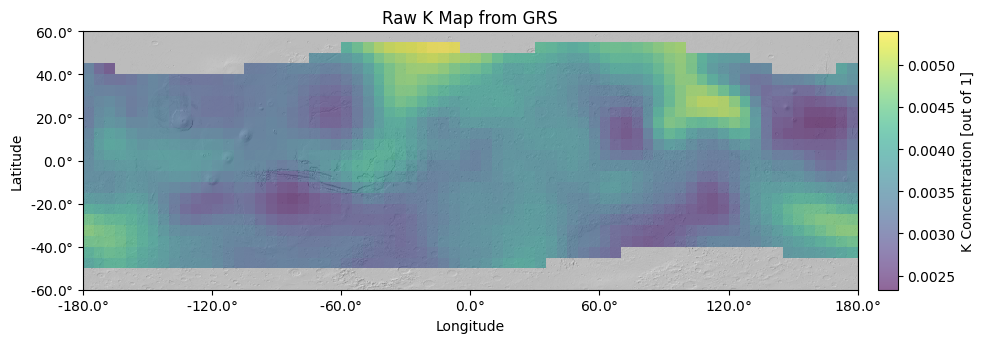

In [3]:
'''You can enable a MOLA shaded relief overlay with `overlay=True`'''

GRS.visualize(element_name='k', overlay=True)

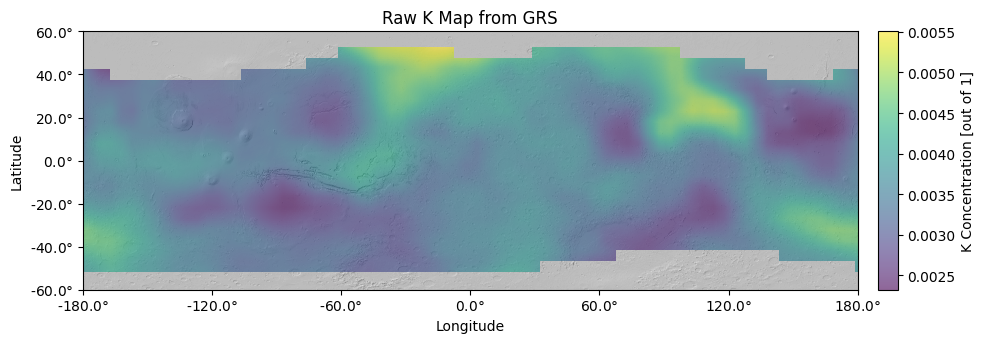

In [4]:
'''The raw GRS data are binned to 5x5 degrees. We can increase the resolution by interpolating to a finer grid. By default, `grid_spacing=5`.'''

GRS.visualize(element_name='k', overlay=True, grid_spacing=1)

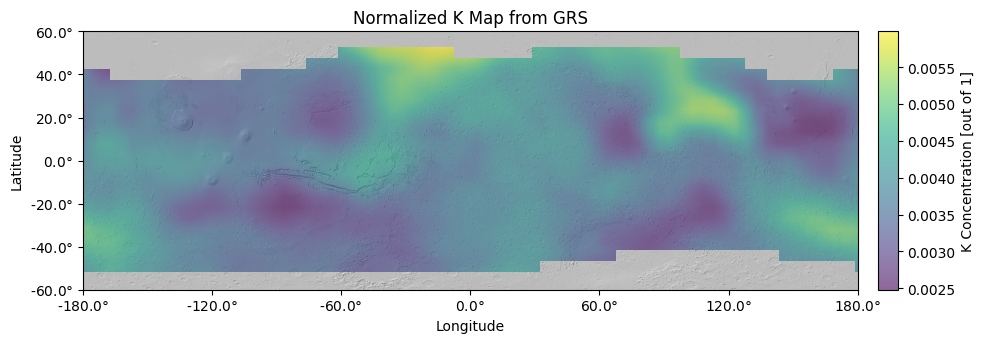

In [5]:
'''
GRS data represent shallow Martian subsurface (top few decimeters). We can get a representative value for the bulk chemistry of the underlying crust by normalizing to a volatile-free basis (free from Cl, H2O, and S). By default, `normalize=False`.

From "Groundwater production from geothermal heating on early Mars and implication for early martian habitability", Ojha et al. 2020, https://www.science.org/doi/10.1126/sciadv.abb1669
    > "For such measurement [from GRS] to represent the bulk chemistry of the martian upper crust, it must be normalized to a volatile-free basis (22). That equates to a 7 to 14% increase in the K, Th, and U abundances (22), which we applied to the chemical maps by renormalizing to Cl, stoichiometric H2O, and S-free basis."
'''

GRS.visualize(element_name='k', normalize=True, overlay=True, grid_spacing=1)

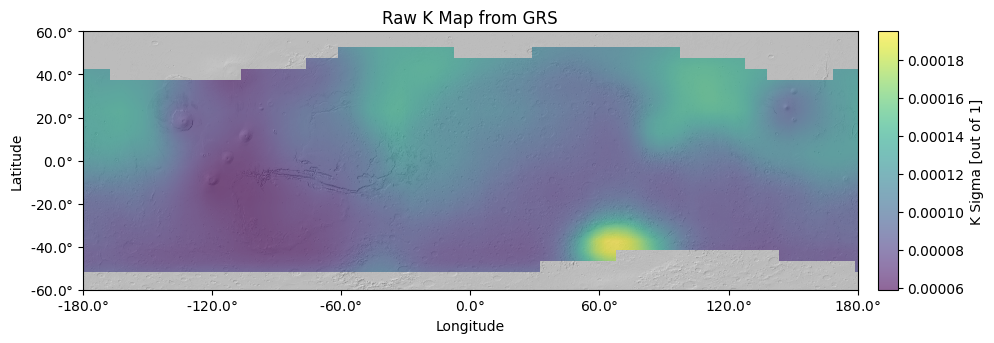

In [6]:
'''By default, we're plotting elemental concentrations. But we can also plot the error associated with the measurements
(on a side note, you can list arguments in any order, and you can leave out 'element_name')'''

GRS.visualize('k', overlay=True, grid_spacing=1, quantity='sigma')

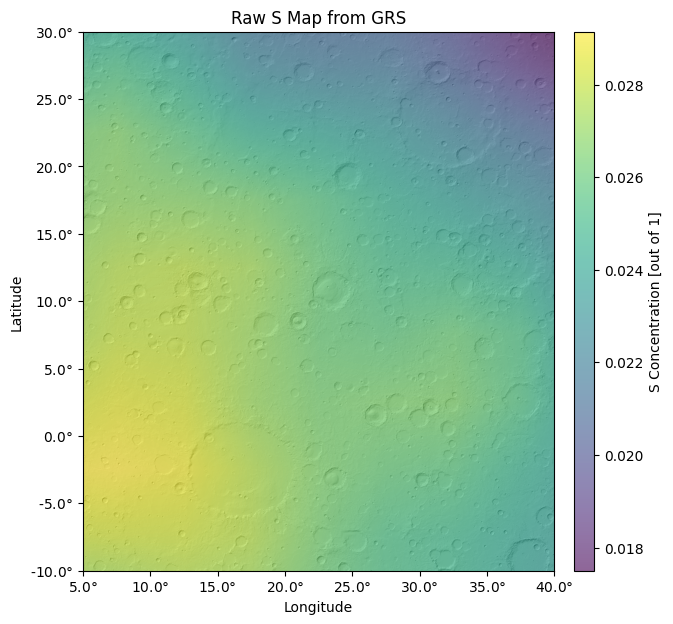

In [6]:
'''You can zoom in on certain regions for higher resolution. 
Let's look at a sulfur map of Arabia Terra.'''

GRS.visualize(element_name='s', lon_bounds=(5,40), lat_bounds=(-10,30), grid_spacing=0.1, overlay=True)

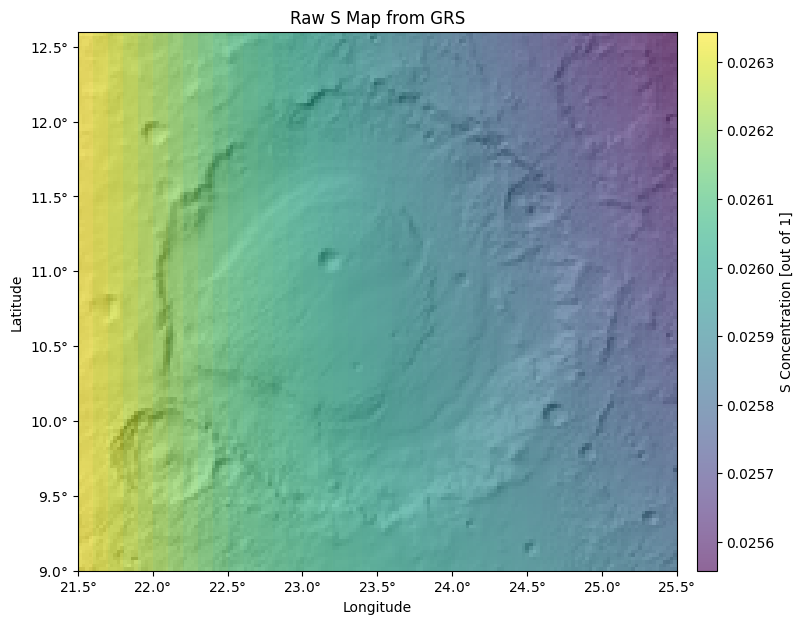

In [8]:
'''Let's look at a 170km diameter crater, Henry'''

GRS.visualize(element_name='s', lon_bounds=(21.5,25.5), lat_bounds=(9,12.6), grid_spacing=0.1, overlay=True)

## 1.2. `get`

The `visualize` method really just calls the `get` method over a grid of values. Use `get` directly if you want to extract values for the sake of calculations.

In [9]:
'''Concentration units are out of one, i.e. multiply by 100 to for weight percent'''

fe_raw = GRS.get(element_name='fe', lon=23.45, lat=45.67)
fe_norm = GRS.get(element_name='fe', lon=23.45, lat=45.67, normalize=True)

print(f'Surface iron concentration: \t{fe_raw*100:.5f} wt%')
print(f'Bulk iron concentration: \t{fe_norm*100:.5f} wt%')
print(f'Percent difference: \t\t{(fe_norm-fe_raw)/fe_raw*100:.5f} %')

Surface iron concentration: 	12.54924 wt%
Bulk iron concentration: 	13.54504 wt%
Percent difference: 		7.93516 %


## 1.3. Documentation

If you ever need a refresher on how to use the module/methods, call `help`

In [10]:
help(GRS)

Help on package redplanet.GRS in redplanet:

NAME
    redplanet.GRS

DESCRIPTION
    Written by Zain Kamal (zain.eris.kamal@rutgers.edu).
    https://github.com/Humboldt-Penguin/redplanet
    
    ------------
    RedPlanet module `GRS.py` allows you to get and plot surface element concentrations derived from the 2001 Mar Odyssey Gamma Ray Spectrometer. The original data is defined in 5 degree bins, but this module allows you to calculate values at exact coordinates by linearly interpolating between the four nearest points. Both exact concentration and volatile-free (normalized to an H20/Cl/Si free basis) are available.
    
    NOTE: The first time you import this module, it will take ~7 seconds to download data. It's only 1 MB, but we're downloading from the original source which is a bit slow. All subsequent loads will be much faster due to caching. 
    
    
    ###################################################################################
    ------------
    METHODS:
    --

In [11]:
help(GRS.visualize)

Help on function visualize in module redplanet.GRS.GRS:

visualize(element_name: str, normalize=False, quantity='concentration', lon_bounds: tuple = (-180, 180), lat_bounds: tuple = (-60, 60), grid_spacing: float = 5, colormap='viridis', overlay=False, transparency_data=0.6, transparency_mola=0.9, figsize=(10, 7))
    DESCRIPTION:
    ------------
        Create a map of concentration/sigma for some element.
    
    
    PARAMETERS:
    ------------
        element_name : str
            Element for which you want to make a global concentration map. Options are ['al','ca','cl','fe','h2o','k','si','s','th']. Casing does not matter.
        
        normalize : bool (default False)
            If True, normalize to a volatile-free (Cl, H2O, S) basis. See `get` docstring for more details.
        
        quantity : str (default 'concentration')
            Quantity to plot. Options are ['concentration', 'sigma'].
        
        lon_bounds, lat_bounds : tuple(2 floats) (default entire 

In [12]:
help(GRS.get)

Help on function get in module redplanet.GRS.GRS:

get(element_name: str, lon: float, lat: float, normalize=False, quantity='concentration') -> float
    DESCRIPTION:
    ------------
        Get GRS-derived concentration/sigma of an element at a desired coordinate.
    
        
    PARAMETERS:
    ------------
        element_name : str
            Element for which you want to make a global concentration map. Options are ['al','ca','cl','fe','h2o','k','si','s','th']. Casing does not matter.
        
        lon : float
            Longitude in range [-180, 180] (lon=0 cuts through Arabia Terra).
        
        lat : float
            Latitude in range [-87.5, 87.5].
        
        normalize : bool (default False)
            If True, normalize to a volatile-free (Cl, H2O, S) basis.
                > "For such measurement [from GRS] to represent the bulk chemistry of the martian upper crust, it must be normalized to a volatile-free basis (22). That equates to a 7 to 14% increase 

---
# 2. `Crust`

In [13]:
from redplanet import Crust

## 2.1. `visualize`

Let's start by building some intuition with the dataset via quick visualizations.

We can create a map of topography ('topo'), moho elevation ('moho'), crustal thickness ('thick'), or crustal density ('rho'/'density'). Model name is formatted f'{Reference_Interior_Model}-{insight_thickness}-{rho_south}-{rho_north}'.

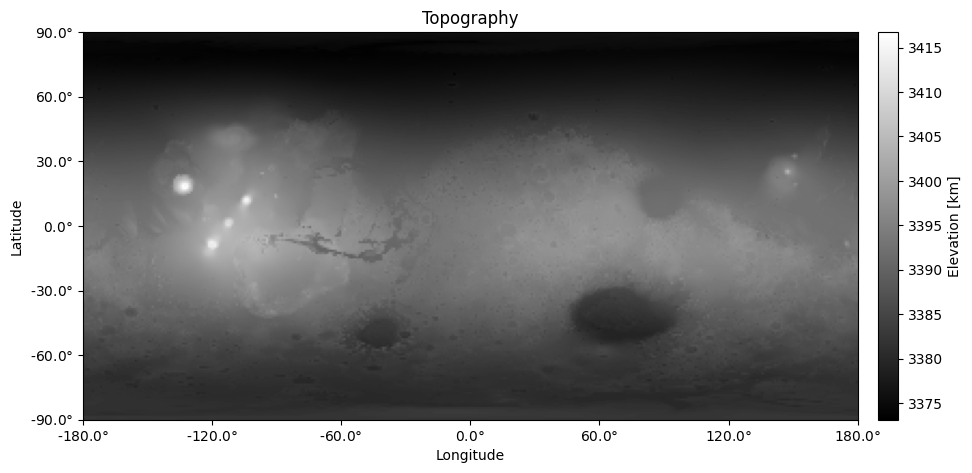

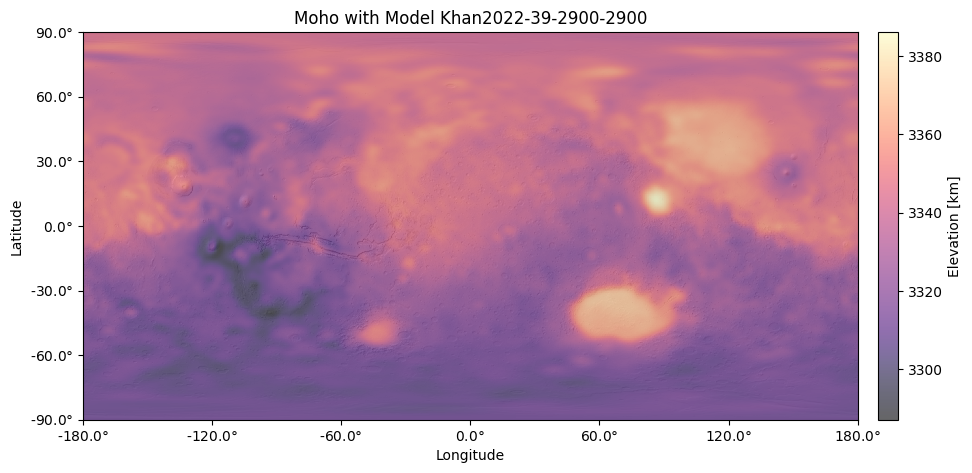

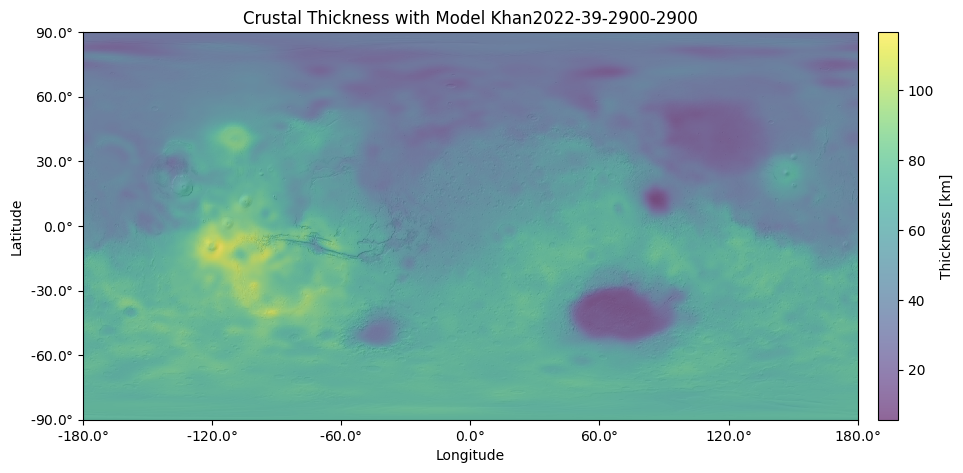

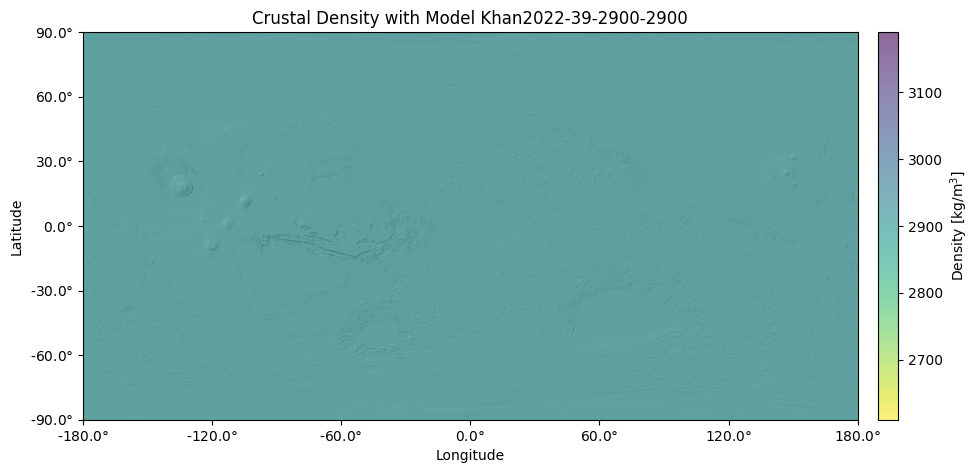

In [14]:
'''Full maps with MOLA overlay'''

Crust.visualize(quantity='topo')
Crust.visualize(quantity='moho', overlay=True)
Crust.visualize(quantity='thick', overlay=True)
Crust.visualize(quantity='rho', overlay=True)

A summary of all available models can be found here: https://docs.google.com/spreadsheets/d/1ZDILcSPdbXAFp60VfyC4xTZzdnAVhx_U/edit?usp=sharing&ouid=107564547097010500390&rtpof=true&sd=true.


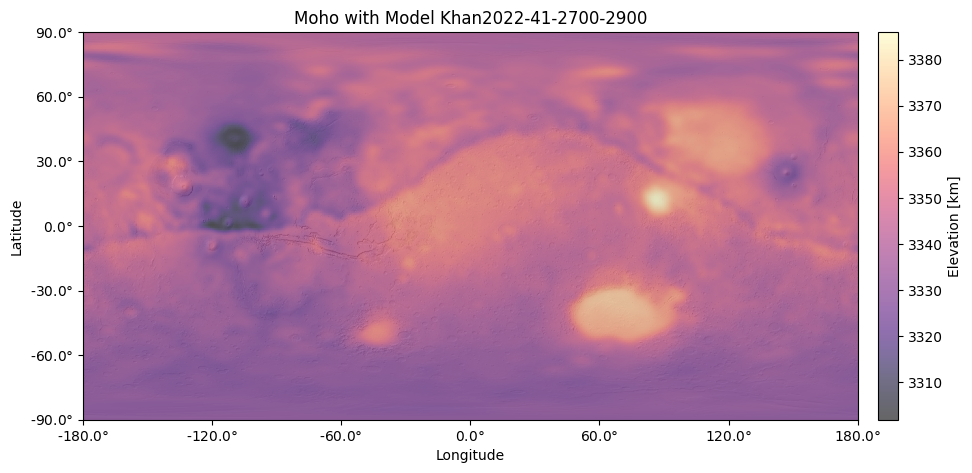

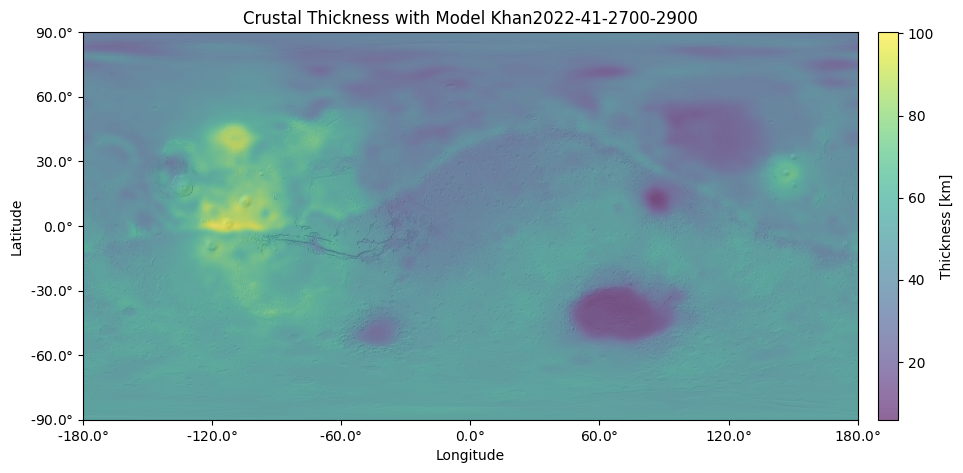

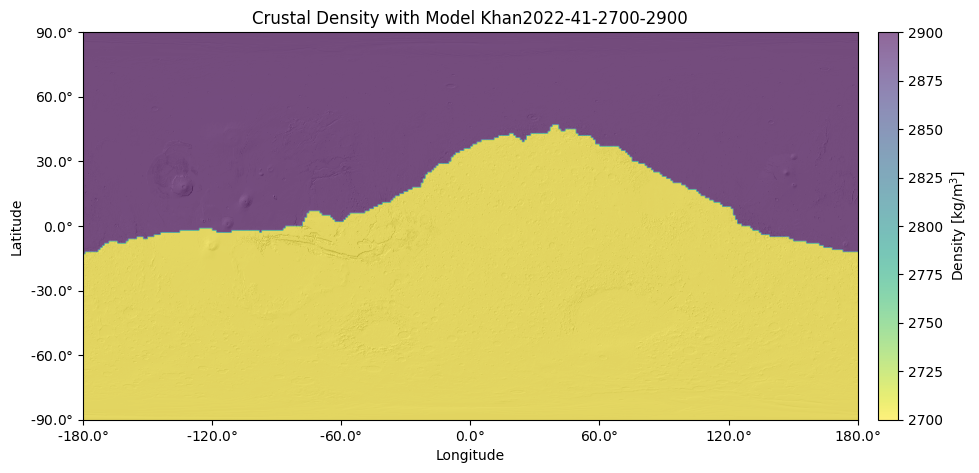

In [22]:
'''We can change the parameters used to generate moho/thickness/density data on the fly. 
Compare with prior plots to see the differences.'''

Crust.peek_models()

# Crust.load_model(RIM='Khan2022', insight_thickness=39, rho_north=2900, rho_south=2900) # this is the default model used to generate the plots above
Crust.load_model(RIM='Khan2022', insight_thickness=41, rho_north=2900, rho_south=2700)

Crust.visualize(quantity='moho', overlay=True)
Crust.visualize(quantity='thick', overlay=True)
Crust.visualize(quantity='rho', overlay=True)

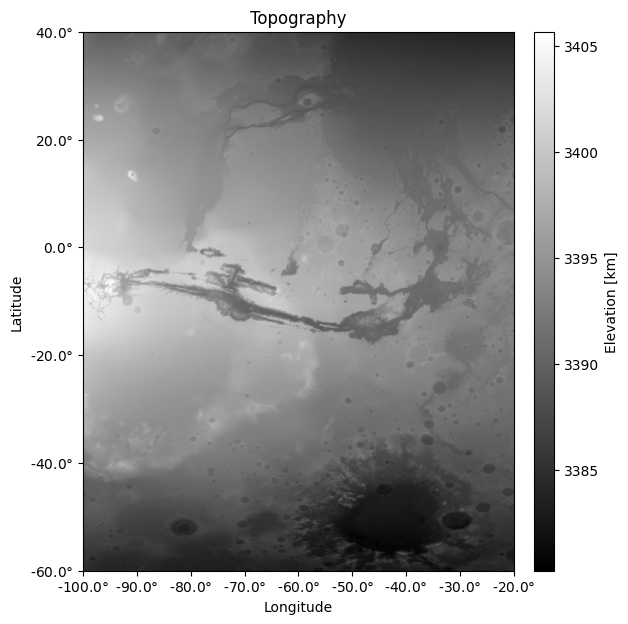

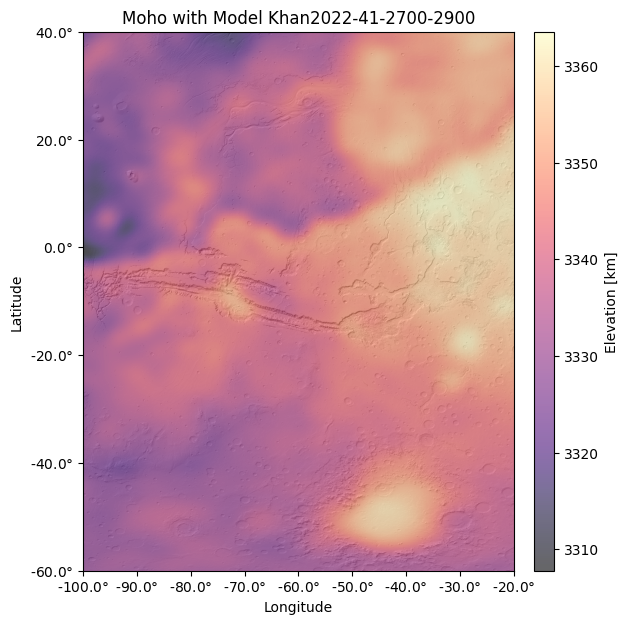

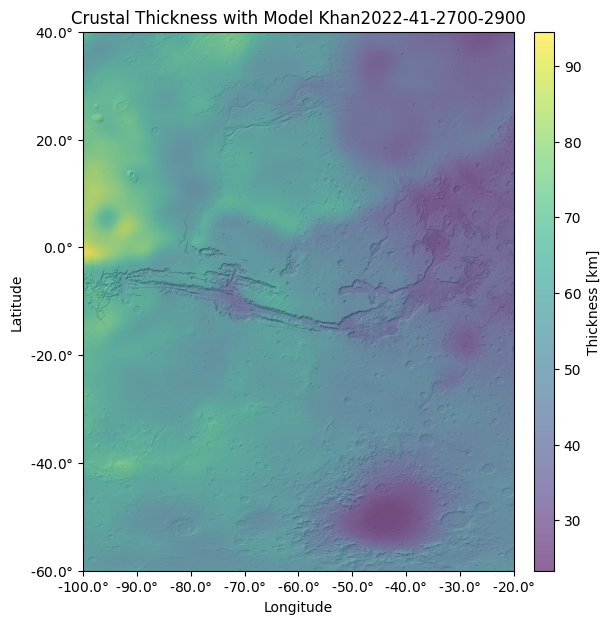

In [16]:
'''You can zoom in on certain regions and decrease grid spacing for higher resolution. 
Let's visualize a cool region around Valles Marineris.'''

lons = (-100,-20)
lats = (-60,40)

Crust.visualize(quantity='topo', lon_bounds=lons, lat_bounds=lats, grid_spacing=0.1)
Crust.visualize(quantity='moho', lon_bounds=lons, lat_bounds=lats, overlay=True, grid_spacing=0.3)
Crust.visualize(quantity='thick', lon_bounds=lons, lat_bounds=lats, overlay=True, grid_spacing=0.3)

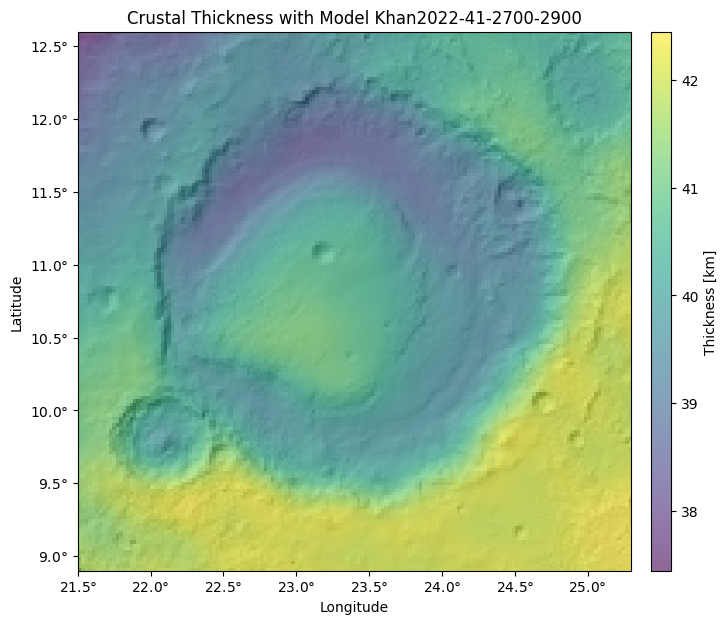

In [20]:
'''Next, let's visualize Henry Crater in Arabia Terra.'''

lons = (21.5, 25.3)
lats = (8.9, 12.6)

Crust.visualize(quantity='thick', lon_bounds=lons, lat_bounds=lats, overlay=True, grid_spacing=0.01)

## 2.2. `get`

The `visualize` method really just calls the `get` method over a grid of values. Use `get` directly if you want to extract values for the sake of calculations.

Text(0, 0.5, 'Crustal Thickness [km]')

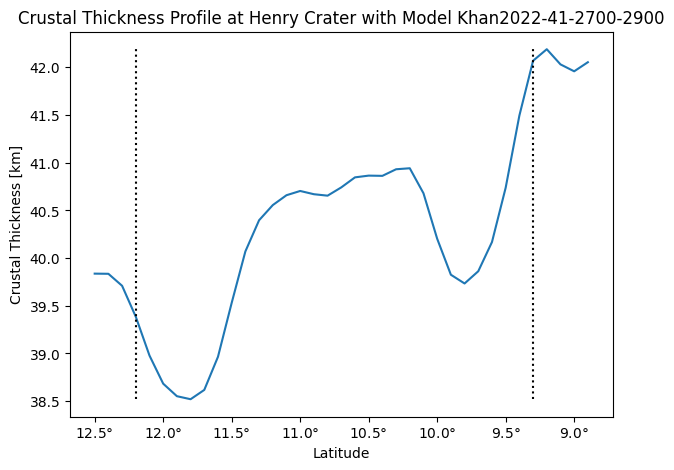

In [35]:
'''let's plot a crustal thickness profile across Henry Crater'''

import numpy as np
import matplotlib.pyplot as plt

lons = (21.5, 25.3)
lats = (8.9, 12.6)

lat_range = np.arange(lats[0], lats[1], 0.1) # you can't get higher resolution than 0.1 degrees since that's the resolution of the data
lon_center = np.mean(lons)


dat_crust = []
for lat in lat_range:
    dat_crust.append(Crust.get('thick', lon_center, lat))     # NOTE this is where we call `get`
dat_crust = np.asarray(dat_crust)



fig = plt.figure(figsize=(7,5))
ax = plt.axes()
lin, = ax.plot(lat_range, dat_crust)

ax.invert_xaxis()

ax.vlines(x=[9.3, 12.2], ymin=np.amin(dat_crust), ymax=np.amax(dat_crust), colors='k', linestyles='dotted')

ax.set_title(f'Crustal Thickness Profile at Henry Crater with Model {Crust.get_model_name()}')
ax.set_xlabel('Latitude')
ax.xaxis.set_major_formatter('{x}$\degree$')
ax.set_ylabel('Crustal Thickness [km]')

Text(0, 0.5, 'Crustal Thickness [km]')

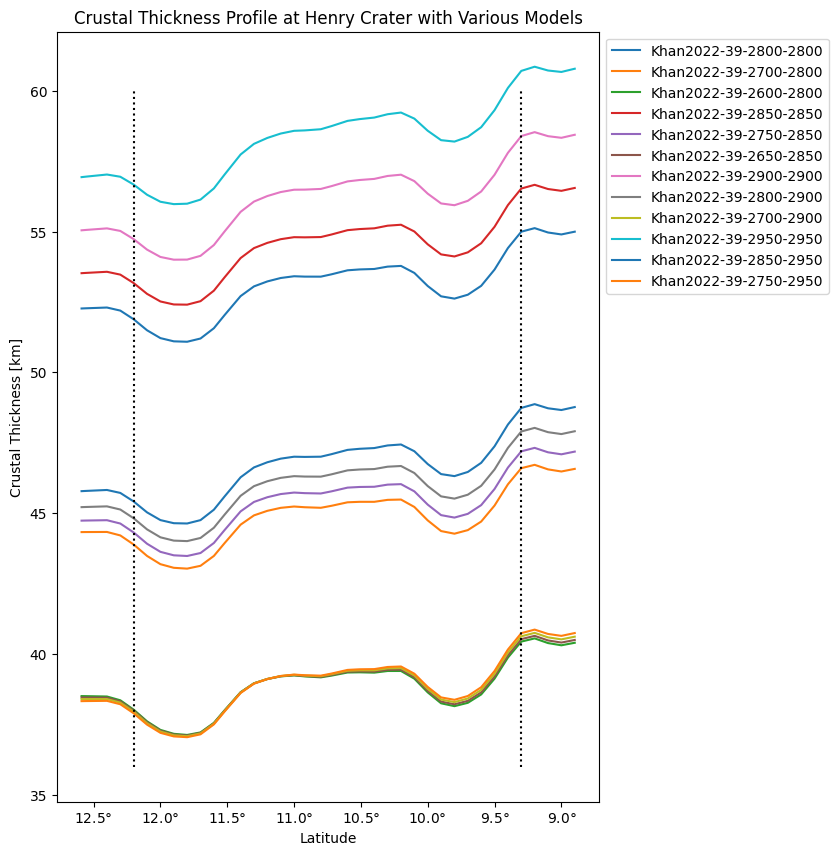

In [ ]:
'''let's plot a crustal thickness profile across Henry Crater with MANY models to show the differences'''

import numpy as np
import matplotlib.pyplot as plt

lons = (21.5, 25.3)
lats = (8.9, 12.6)

lat_range = np.arange(lats[0], lats[1], 0.01)
lon_center = np.mean(lons)


meta_dat = []
meta_dat_names = []

for rhon in np.arange(2800, 3100, 50):
    for rhos in (rhon, rhon-100, rhon-200):
        if Crust.load_model(RIM='Khan2022', insight_thickness=39, rho_north=rhon, rho_south=rhos, suppress_model_error=True):
            dat_crust = []
            for lat in lat_range:
                dat_crust.append(Crust.get('thick', lon_center, lat))
            dat_crust = np.asarray(dat_crust)
            meta_dat.append(dat_crust)
            meta_dat_names.append(Crust.get_model_name())
            

fig = plt.figure(figsize=(7,10))
ax = plt.axes()

for i in range(len(meta_dat)):
    lin, = ax.plot(lat_range, meta_dat[i])
    lin.set_label(meta_dat_names[i])

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax.invert_xaxis()

ax.vlines(x=[9.3, 12.2], ymin=36, ymax=60, colors='k', linestyles='dotted')

ax.set_title(f'Crustal Thickness Profile at Henry Crater with Various Models')
ax.set_xlabel('Latitude')
ax.xaxis.set_major_formatter('{x}$\degree$')
ax.set_ylabel('Crustal Thickness [km]')

## 1.3. Documentation

If you ever need a refresher on how to use the module/methods, call `help`

In [ ]:
help(Crust)

Help on package redplanet.Crust in redplanet:

NAME
    redplanet.Crust

DESCRIPTION
    Written by Zain Kamal (zain.eris.kamal@rutgers.edu).
    https://github.com/Humboldt-Penguin/redplanet
    
    ------------
    RedPlanet module `Crust.py` allows you to access and plot high-resolution data for topography, moho, crustal thickness, and crustal density. The original data is defined in 0.1 degree bins (can be increased up to 0.0346, but this is not recommended), and we let you calculate values at exact coordinates by liniearly interpolating between the four nearest points.
    
    NOTE: The first time you import this module, it can take a few seconds to download data (~70 MB). All subsequent loads will be much faster due to caching. 
    
    
    
    ###################################################################################
    ------------
    METHODS:
    ------------
    >>> Crust.get(
                quantity: str, 
                lon: float, 
                lat: fl

In [ ]:
help(Crust.visualize)

Help on function visualize in module redplanet.Crust.Crust:

visualize(quantity: str, lon_bounds: tuple = (-180, 180), lat_bounds: tuple = (-90, 90), grid_spacing: float = 1, colormap='') -> None
    DESCRIPTION:
    ------------
        Create a map of topography ('topo'), moho elevation ('moho'), crustal thickness ('thick'), or crustal density ('rho'/'density'). Model name is formatted f'{Reference_Interior_Model}-{insight_thickness}-{rho_south}-{rho_north}'.
    
        
    PARAMETERS:
    ------------
        quantity : str
            Options are ['topo'/'topography', 'moho', 'thick'/'thickness', 'rho'/'density'].
    
        lon_bounds, lat_bounds : tuple(2 floats) (default entire map)
            Bounding box for visualization. Longitude in range [-180, 180], latitude in range [-87.5, 87.5].
        
        grid_spacing : float (default to 1)
            Spacing between "pixels" in degrees. Note that smaller resolutions will take longer to plot.
        
        colormap : s

In [ ]:
help(Crust.get)

Help on function get in module redplanet.Crust.Crust:

get(quantity: str, lon: float, lat: float) -> float
    DESCRIPTION:
    ------------
        Get topography ('topo'), moho elevation ('moho'), crustal thickness ('thick'), or crustal density ('rho'/'density') at a specific coordinate. Units are km and kg/m^3.
    
        
    PARAMETERS:
    ------------
        quantity : str
            Options are ['topo'/'topography', 'moho', 'thick'/'thickness', 'rho'/'density'].
    
        lon, lat : float
            Coordinates in degrees, with longitude in range [-180, 180] and latitude in range [-90, 90].
    
            
    RETURN:
    ------------
        float
            'topo' -> elevation [km]
            'moho' -> elevation [km]
            'thick' -> thickness [km]
            'rho' -> density [kg/m^3]



In [21]:
help(Crust.load_model)

Help on function load_model in module redplanet.Crust.Crust:

load_model(RIM, insight_thickness, rho_north, rho_south, grid_spacing=-1, suppress_model_error=False, suppress_grid_error=False) -> bool
    DESCRIPTION:
    ------------
        Load a moho and crustal thickness dataset based on the provided parameters. The data itself comes from a file of spherical harmonic coefficients which are downloaded/cached from a massive Google Drive folder.
        
        A summary of all available models can be found here: https://docs.google.com/spreadsheets/d/1ZDILcSPdbXAFp60VfyC4xTZzdnAVhx_U/edit?usp=sharing&ouid=107564547097010500390&rtpof=true&sd=true.
    
        
    PARAMETERS:
    ------------
        RIM : str
            Reference interior model name. Options are ["DWThot","DWThotCrust1","DWThotCrust1r","EH45Tcold","EH45TcoldCrust1","EH45TcoldCrust1r","EH45ThotCrust2","EH45ThotCrust2r","LFAK","SANAK","TAYAK","DWAK","ZG_DW","YOTHotRc1760kmDc40km","YOTHotRc1810kmDc40km","Khan2022"]
  

---
# Miscellaneous

## I. Pre-load large data files

In [22]:
import redplanet
redplanet.preload() # data for all modules is the default, but you can specify individual modules if desired
# redplanet.preload('GRS')

## II. Clear cached data

In [23]:
import redplanet
redplanet.clear_cache() # text prompt input for confirmation

Are you sure you want to delete all files in C:\Users\Eris\AppData\Local\redplanet\redplanet\Cache? (y/n) 
